In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [2]:
#data = np.genfromtxt('astronomicalunit.csv', delimiter=',', dtype=None)
data = pd.read_csv('astronomicalunit.csv')

In [3]:
data_1 = data.loc[data['Experimenter'] == 'Jodrell Bank'].values
data_2 = data.loc[data['Experimenter'] == 'Spencer Jones'].values
data_3 = data.loc[data['Experimenter'] != 'Spencer Jones']
data_3 = data_3.loc[data_3['Experimenter'] != 'Jodrell Bank'].values

<ErrorbarContainer object of 3 artists>

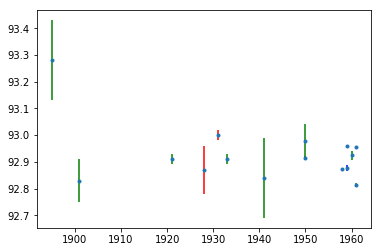

In [4]:
plt.errorbar(list(data_3[:,1]), list(data_3[:,2]), list(data_3[:,4]-data_3[:,3]), ecolor='g', linestyle='None', marker='.')
plt.errorbar(list(data_2[:,1]), list(data_2[:,2]), list(data_2[:,4]-data_2[:,3]), ecolor='r', linestyle='None', marker='.')
plt.errorbar(list(data_1[:,1]), list(data_1[:,2]), list(data_1[:,4]-data_1[:,3]), ecolor='b', linestyle='None', marker='.')

In [6]:
#transformer = FA(n_components=3, random_state=0)
#X_transformed = transformer.fit_transform(A)
#X_transformed.shape
#plt.scatter(X_transformed[:,0],X_transformed[:,1], c='blue',s=10, edgecolor='k')

In [15]:
df_features = pd.read_csv('life.csv')
df_features

,m0,m25,m50,m75,w0,w25,w50,w75
0,63.0,51.0,30.0,13.0,67.0,54.0,34.0,15.0
1,34.0,29.0,13.0,5.0,38.0,32.0,17.0,6.0
2,38.0,30.0,17.0,7.0,38.0,34.0,20.0,7.0
3,59.0,42.0,20.0,6.0,64.0,46.0,25.0,8.0
4,56.0,38.0,18.0,7.0,62.0,46.0,25.0,10.0
5,62.0,44.0,24.0,7.0,69.0,50.0,28.0,14.0
6,50.0,39.0,20.0,7.0,55.0,43.0,23.0,8.0
7,65.0,44.0,22.0,7.0,72.0,50.0,27.0,9.0
8,56.0,46.0,24.0,11.0,63.0,54.0,33.0,19.0
9,69.0,47.0,24.0,8.0,75.0,53.0,29.0,10.0


In [20]:
fa = FactorAnalyzer()
fa.analyze(df_features, 3, method='mle')
fa.loadings

,Factor1,Factor2,Factor3
m0,1.055760,0.022010,-0.150089
m25,0.620099,0.307597,-0.084773
m50,0.164390,0.935944,-0.065163
m75,-0.225022,0.658005,0.369869
w0,1.079491,-0.198469,0.032377
w25,0.696529,0.025120,0.401052
w50,0.365778,0.125179,0.629337
w75,-0.094176,-0.014945,0.984142


In [33]:
from factor_analyzer import FactorAnalyzer,calculate_bartlett_sphericity,calculate_kmo
import os
import math

In [58]:
def do_analysis(filename, factors, method, rotation):
    """
    Use the `FactorAnalyzer()` class to perform the factor analysis
    and return a dictionary with relevant results for given scenario.
    """
    data = pd.read_csv(filename)

    rotation = None if rotation == 'none' else rotation
    method = {'uls': 'minres'}.get(method, method)

    fa = FactorAnalyzer()
    fa.analyze(data, factors, method=method, rotation=rotation)
    
    evalues, values = fa.get_eigenvalues()

    return {'value': values,
            'evalues': evalues,
            'loading': fa.loadings,
            'uniquenesses': fa.get_uniqueness(),
            'communalities': fa.get_communalities()}

In [60]:
res = do_analysis('life.csv', 3, method='ml', rotation=None)

In [64]:
res['value']

,Common_Factor_Eigenvalues
0,5.512567
1,1.230727
2,0.361385
3,0.031618
4,0.021240
5,-0.000317
6,-0.005204
7,-0.054643


In [65]:
res['evalues']

,Original_Eigenvalues
0,5.602410
1,1.358182
2,0.499327
3,0.308126
4,0.154690
5,0.058634
6,0.012822
7,0.005810


In [67]:
res['loading']

,Factor1,Factor2,Factor3
m0,0.981850,-0.151733,0.090123
m25,0.747996,0.101150,0.261865
m50,0.679664,0.492292,0.478994
m75,0.375629,0.697035,0.292061
w0,0.983536,-0.144065,-0.083668
w25,0.943209,0.310921,-0.051167
w50,0.802712,0.576965,-0.051421
w75,0.463666,0.771676,-0.208645


In [68]:
res['uniquenesses']

,Uniqueness
m0,0.004826
m25,0.361698
m50,0.066271
m75,0.287745
w0,0.004903
w25,0.011067
w50,0.020121
w75,0.145997


In [69]:
res['communalities']

,Communalities
m0,0.995174
m25,0.638302
m50,0.933729
m75,0.712255
w0,0.995097
w25,0.988933
w50,0.979879
w75,0.854003


In [70]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,3.369927,1.459976,1.697254
Proportion Var,0.421241,0.182497,0.212157
Cumulative Var,0.421241,0.603738,0.815895
